# **Deep Learning (CNN) task**
# **<span style="color: red;">Caio César Macedo Antunes - 22153136</span>**

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
   

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Data preparation

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

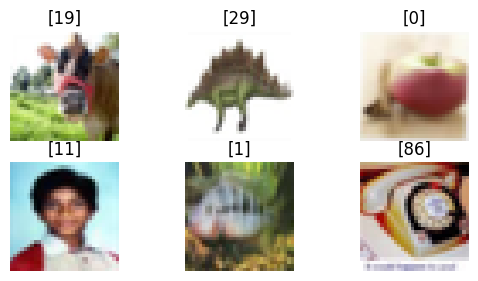

In [ ]:
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].astype("uint8"))
    plt.title(y_train[i])
    plt.axis("off")

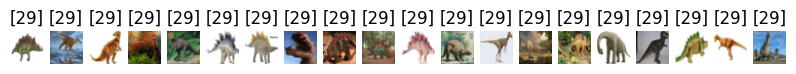

In [ ]:
num_images = 20
label_to_display = 29

indices = np.where(y_train == label_to_display)[0][:num_images]

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[idx].astype("uint8"))
    plt.title(y_train[idx])
    plt.axis("off")
plt.show()

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Label conversion to *one_hot*

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, len(np.unique(y_train)))

In [ ]:
y_train.shape

(50000, 100)

In [ ]:
y_test.shape

(10000, 1)

## Data augmentation

In [ ]:
data_aug = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.RandomFlip(mode="horizontal"),
        layers.RandomRotation(0.25),
        layers.RandomZoom(0.2),
    ]
)

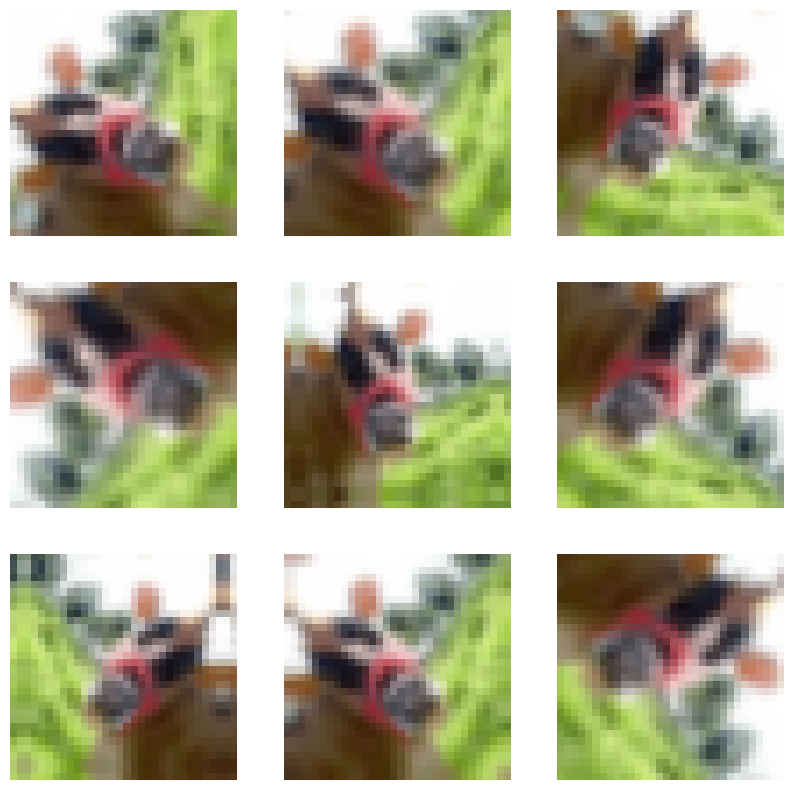

In [ ]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(x_train):
    for i in range(9):
        augmented_image = data_aug(np.expand_dims(image, axis=0))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")
    break

# CNN bulding and training

## Support functions

In [ ]:
initializer = keras.initializers.HeNormal(seed=1)
weight_regularizer = keras.regularizers.L2(1e-7)
act_regularizer = keras.regularizers.L2(1e-8)

def lr_scheduler(epoch, lr):
    if epoch < 85:
        return lr
    else:
        return lr * np.float32(tf.math.exp(-0.1))

## Network architecture

### Architecture with VGG (not incorporated into the final training)

In [ ]:
# conv_base = keras.applications.VGG16(
#     weights="imagenet",
#     include_top=False,
#     input_shape=(32, 32, 3),
#     pooling="max",
# )
# conv_base.trainable = False

# inputs = keras.Input(shape=(32, 32, 3))
# x = data_aug(inputs)
# x = keras.applications.vgg16.preprocess_input(x)
# x = conv_base(x)
# x = layers.Flatten()(x)
# x = layers.Dense(512, activation="relu", kernel_initializer=keras.initializers.HeUniform(seed=1),
#                  bias_regularizer=weight_regularizer, kernel_regularizer=weight_regularizer, activity_regularizer=act_regularizer)(x)
# x = layers.Dropout(0.15)(x)
# outputs = layers.Dense(20, activation="softmax")(x)

# model = keras.Model(inputs=inputs, outputs=outputs)

# model.compile(loss="categorical_crossentropy",
#               optimizer=keras.optimizers.Adam(1e-3),
#               metrics=["accuracy"])

### Handcrafted architecture

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = data_aug(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=initializer)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=initializer)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=initializer)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=initializer)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer=initializer,
                   bias_regularizer=weight_regularizer, kernel_regularizer=weight_regularizer, activity_regularizer=act_regularizer)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer=initializer,
                   bias_regularizer=weight_regularizer, kernel_regularizer=weight_regularizer, activity_regularizer=act_regularizer)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer=initializer,
                   bias_regularizer=weight_regularizer, kernel_regularizer=weight_regularizer, activity_regularizer=act_regularizer)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer=initializer,
                   bias_regularizer=weight_regularizer, kernel_regularizer=weight_regularizer, activity_regularizer=act_regularizer)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)


x = layers.Flatten()(x)

x = layers.Dense(256, activation="relu", kernel_initializer=keras.initializers.HeUniform(seed=1),
                 bias_regularizer=weight_regularizer, kernel_regularizer=weight_regularizer, activity_regularizer=act_regularizer)(x)
x = layers.Dense(128, activation="relu", kernel_initializer=keras.initializers.HeUniform(seed=1),
                 bias_regularizer=weight_regularizer, kernel_regularizer=weight_regularizer, activity_regularizer=act_regularizer)(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(100, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(3e-4),
              metrics=["accuracy"])

## Summary

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 6,836,260 (26.08 MB)

 Trainable params: 6,832,420 (26.06 MB)

 Non-trainable params: 3,840 (15.00 KB)

## Callbacks definition

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="cnn_task.keras",
      save_best_only=True,
      monitor="val_loss"),
    keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=0),
    keras.callbacks.EarlyStopping(patience=10, monitor="val_loss")
]

## Model training

In [ ]:
history = model.fit(x_train, y_train, epochs=175, validation_split=0.15, callbacks=callbacks, batch_size=64, shuffle=True)

Epoch 1/175
665/665 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.0408 - loss: 4.5070 - val_accuracy: 0.1076 - val_loss: 3.9983 - learning_rate: 3.0000e-04
Epoch 2/175
665/665 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0972 - loss: 4.0131 - val_accuracy: 0.1349 - val_loss: 3.8183 - learning_rate: 3.0000e-04
Epoch 3/175
665/665 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.1328 - loss: 3.7294 - val_accuracy: 0.1352 - val_loss: 3.9798 - learning_rate: 3.0000e-04
Epoch 4/175
665/665 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.1722 - loss: 3.5006 - val_accuracy: 0.1973 - val_loss: 3.4290 - learning_rate: 3.0000e-04
Epoch 5/175
665/665 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.1997 - loss: 3.3356 - val_accuracy: 0.2325 - val_loss: 3.1440 - learning_rate: 3.0000e-04
Epoch 6/175
665/665 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.2269 - loss: 3.1936 - val_accuracy: 0.2561 - val_loss: 3.0701 - learning_rate: 3.0000e-04
Epoch 7/175
665/665 ━━━━━━━━━━━━━━━━━━━━ 41s 4

# Evaluation

## Training metrics

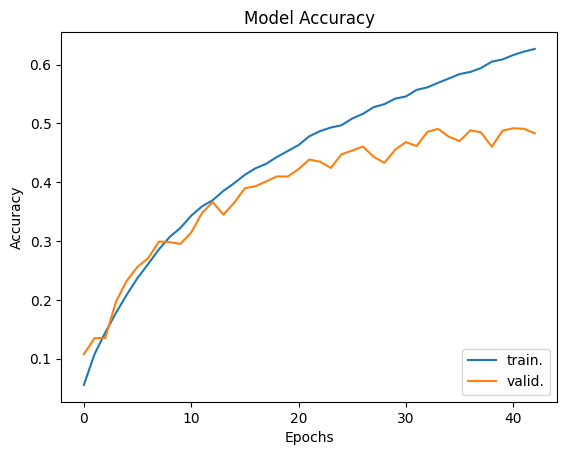

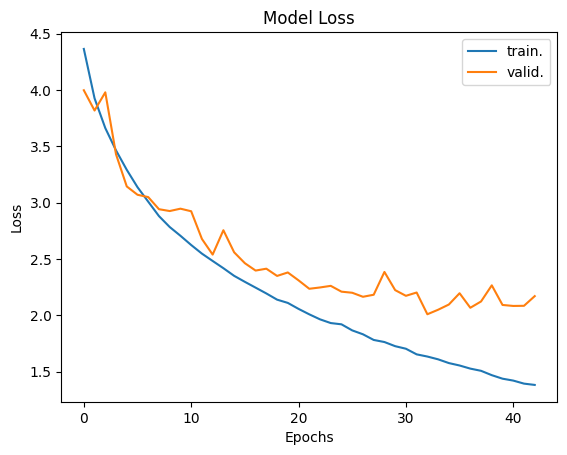

In [ ]:
model = tf.keras.models.load_model("cnn_task.keras")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train.', 'valid.'], loc='lower right')
plt.show()

print("\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train.', 'valid.'], loc='upper right')
plt.show()

## Test metrics

In [ ]:
y_test_labels = tf.keras.utils.to_categorical(y_test, num_classes=100)

# model = keras.models.load_model("cnn_task.keras")
model.evaluate(x_test, y_test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4973 - loss: 1.9715


[1.9499517679214478, 0.5]

In [ ]:
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

print(f'y_pred shape: {y_pred.shape}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
y_pred shape: (10000,)


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df = report_df.loc[['accuracy', 'macro avg', 'weighted avg']]

report_df

,precision,recall,f1-score,support
accuracy,0.500000,0.5,0.500000,0.5
macro avg,0.524618,0.5,0.494955,10000.0
weighted avg,0.524618,0.5,0.494955,10000.0


# Conclusion

The dataset contains highly contrasting data, which led to the model having very high loss. Based on comparative web research, a deep architecture with over 2 million parameters helped improve the results. Additionally, He initialization for weights (with ReLU activation function), Batch Normalization, L2 regularization, Dropout, and data augmentation were also impactful in enhancing performance.

However, there is still much progress to be made. Achieving optimal results would require a larger architecture, with more convolutional filters and possibly more Dense layers.

The learning rate value was determined after extensive empirical experimentation, as were the L2 regularization rates, Dropout rates, and Batch size for training. Moreover, although a learning rate scheduler was available, it was not utilized since the model training was halted through early stopping before reaching the epoch set for rate decay.